# Activity 9

In [14]:
#Import libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
#Check SSL certificate 
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [33]:
#read the HTML from the URL
url = 'https://www.gutenberg.org/browse/scores/top/ebooks'
response = requests.get(url)

In [34]:
#check web request
def check_status(r):
    if r.status_code==200:
        print("Success!")
    else:
        print("Fail!")

In [35]:
check_status(response)

Success!


In [36]:
#Decode the response and pass on to beautiful soup for HTML parsing
contents= response.content.decode(response.encoding)


In [38]:
soup = BeautifulSoup(contents, 'html.parser')

In [39]:
#find all href tags and store them in the list of links
lst_links=[]
for link in soup.find_all('a'):
    lst_links.append(link.get('href'))

In [40]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [42]:
#use a regular expression to find the numeric digits 
#initialize the empty list
booknum=[]

for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        booknum.append(int(n[0]))

In [43]:
#print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)

[1, 1, 7, 7, 30, 30, 1342, 11, 1661, 98, 2701, 65903, 84, 65901, 174, 65902, 64317, 2600, 65908, 4300, 345, 65900, 5200, 1232, 63256, 1952, 2554, 2591, 1260, 45, 6133, 65907, 27827, 47605, 65910, 74, 6130, 2542, 1400, 58585, 135, 5740, 16, 43, 205, 1184, 514, 29728, 65909, 996, 30254, 76, 244, 46, 1497, 65912, 55, 219, 36, 829, 2680, 768, 844, 1998, 28054, 902, 120, 5739, 158, 863, 32241, 236, 4980, 730, 2852, 1080, 65904, 1727, 1399, 25717, 4363, 766, 65896, 61085, 51233, 408, 33283, 25344, 61262, 26184, 161, 132]


In [44]:
#step 9
soup.text[:2000]

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright Procedures\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not co

In [45]:
#step 10-13
lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [46]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [47]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [48]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Tale of Two Cities by Charles Dickens 
Moby Dick
Psychology of the Unconscious by C
Frankenstein
Heart of the World by H
The Picture of Dorian Gray by Oscar Wilde 
Tomorrow the World
The Great Gatsby by F
War and Peace by graf Leo Tolstoy 
Illuminated illustrations of Froissart by Jean Froissart 
Ulysses by James Joyce 
Dracula by Bram Stoker 
Over Fen and Wold by James John Hissey 
Metamorphosis by Franz Kafka 
The Prince by Niccol
The American Diary of a Japanese Girl by Yon
The Yellow Wallpaper by Charlotte Perkins Gilman 
Crime and Punishment by Fyodor Dostoyevsky 
Grimms
Jane Eyre
Anne of Green Gables by L
The Extraordinary Adventures of Arsene Lupin
Wounded Souls by Philip Gibbs 
The Kama Sutra of Vatsyayana by Vatsyayana 
Proofs of a Conspiracy against all the Religions and Governments of Europe by John Robison 
Norse mythology
The Adventures of Tom Sa

# Activity 10

In [6]:
#importing libraries 
import json

In [7]:
#step2-4
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [9]:
#step 5-6
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [10]:
#step7 
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [11]:
#step 8
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [12]:
#step 9
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [15]:
#step10
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=98450dc3
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico, Australia
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,079,408
imdbID: tt0120338
--------------------------------------------------


In [16]:
#step 11
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=98450dc3
Error encountered:  Movie not found!


# Connect to the Twitter API and do a simple data pull

In [11]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tweepy
import requests
import json

In [2]:
consumer_key='RN7Wy2OnAQqTmYZZNGNvtWXTM'  
consumer_secret='zeD3RAywPNeKdmXETDjAx9g7zvb5Et6pdBksoj4zYDOYTVbyWH'
bearer_token='AAAAAAAAAAAAAAAAAAAAAJeHSAEAAAAAHPJ7TrEL8P%2Ff3%2BJqKQauIPw98YE%3DLBBvsrUtVVRxgxnQBP0lyoQ1HGmOymBsGcVHJuH2acpZqPTNz4'

In [17]:
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(bearer_token, bearer_token)

api = tweepy.API(auth)
#api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search_30_day,environment_name='prod', query='Data Science', ).items(20):
    print(tweet.text)

RT @INFJLOVE: Science comes w/factual data &amp; information based upon a magnitude of studies but where’s the information, where’s the studies…
RT @CoolerData: Financial firms should leverage machine learning to make anomaly detection easier https://t.co/UooGKWNm0A #GetMoreInsights…
#ai #ml #tech #data #technology #IoT #5G #robot #science #innovation #cloud #business #news #future
Financial firms… https://t.co/WQLM2gHSw2
@kimusan Contact the #EVL researchers who did GP4D to find out what vis techniques worked &amp; which to avoid: Dan… https://t.co/CDyb3SsAxl
RT @CoolerData: Financial firms should leverage machine learning to make anomaly detection easier https://t.co/UooGKWNm0A #GetMoreInsights…
RT @CoolerData: Financial firms should leverage machine learning to make anomaly detection easier https://t.co/UooGKWNm0A #GetMoreInsights…
RT @Doxyaxone: More #DataScience Cheatsheets. #Python #BigData #Analytics #AI #IoT #IIoT #Azure #PyTorch #RStats #DotNet #C #CPP #Java #CSh…
RT @DJDeMari

In [18]:
for tweet in tweepy.Cursor(api.search_30_day,environment_name='prod', query='NBA Finals', ).items(20):
    print(tweet.text)

RT @ThunderFilmRoom: I’m treating this year’s summer league like an NBA Finals run.

it’ll be better than 2012 lol. https://t.co/sH2bO2qkov
RT @NFL_Memes: The last time the Bucks won an NBA championship, the Cowboys won the next Super Bowl. The last time the Suns lost in the NBA…
RT @ThunderFilmRoom: I’m treating this year’s summer league like an NBA Finals run.

it’ll be better than 2012 lol.
RT @MattWalshBlog: Michael Jordan Leaves Game 7 Of The NBA Finals To Focus On Mental Health
RT @rohamg: This is a big one: the @nbatopshot #NBAFinals legendary drop 🏆  is TOMORROW. https://t.co/EYrPobwGNZ

To celebrate this 🔥 #NBA…
@USAGym If this was Michael Jordan or LeBron James, quitting on their teams during the NBA finals due to mental iss… https://t.co/bWBroCwkh0
RT @rohamg: This is a big one: the @nbatopshot #NBAFinals legendary drop 🏆  is TOMORROW. https://t.co/EYrPobwGNZ

To celebrate this 🔥 #NBA…
I’m treating this year’s summer league like an NBA Finals run.

it’ll be better than 2012 

# visualizations

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df= pd.read_csv(r'C:\Users\nickm\Documents\train.csv')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [74]:
X_survived = df.groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_survived = df.groupby('Survived').size().reset_index(name='Counts')['Counts']

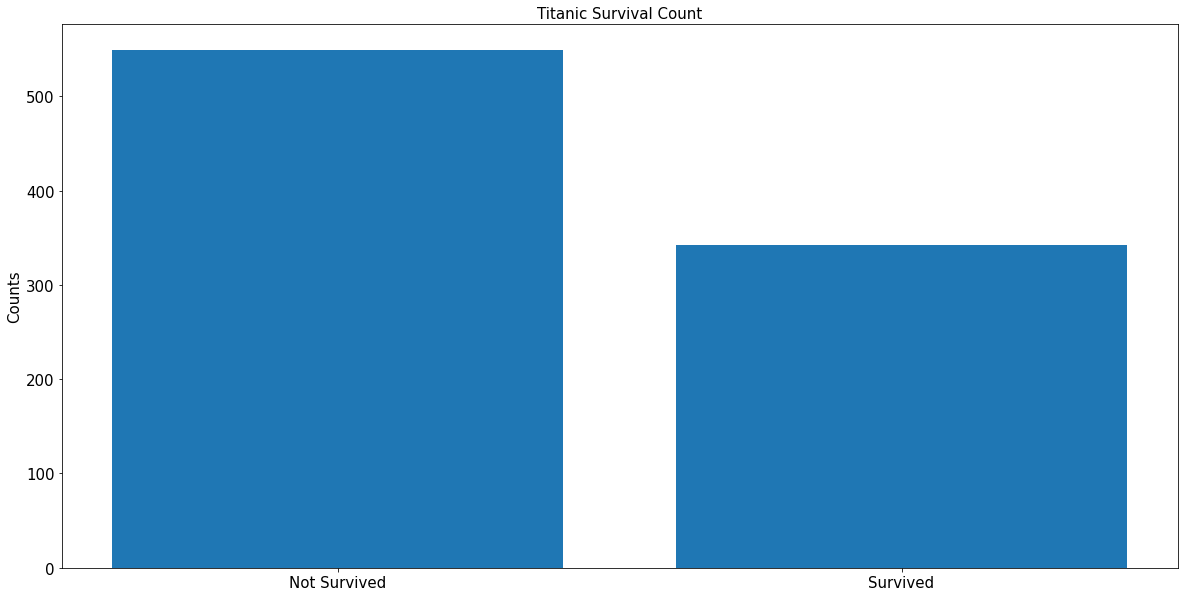

In [80]:
plt.bar(X_survived, Y_survived)
plt.title('Titanic Survival Count', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.tick_params(axis='both', labelsize=15)
plt.show()

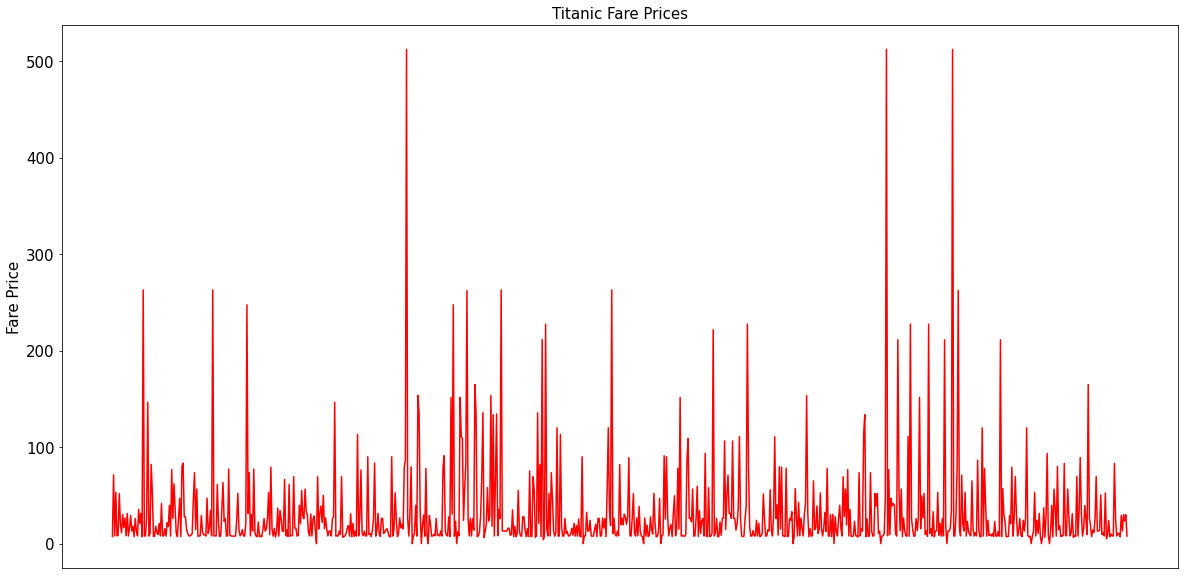

In [76]:
ypoints = df.Fare

plt.plot(ypoints, color = 'r')
plt.ylabel('Fare Price', fontsize=15)
plt.title('Titanic Fare Prices', fontsize=15)
plt.xticks([])
plt.tick_params(axis='y', labelsize=15)

plt.show()

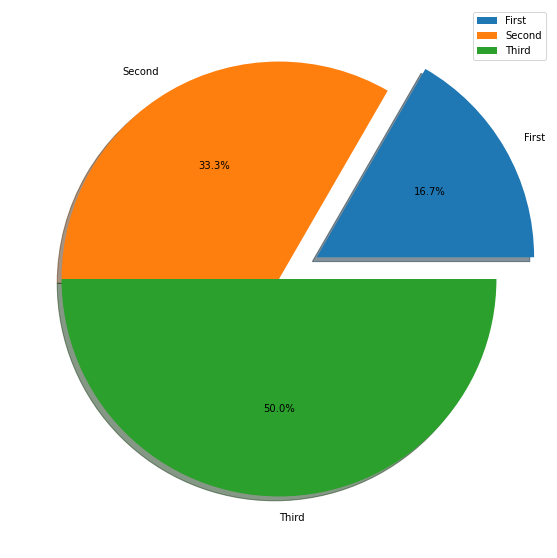

In [77]:

y= df.groupby('Pclass').size().reset_index(name='Counts')['Pclass']
mylabels = ['First', 'Second','Third']
myexplode = [0.2, 0, 0]
#plt.pie(y, labels = mylabels)
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%') 

plt.legend()
plt.show() 